In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", None)
pd.set_option("precision", 3)
sns.set_context("talk") # talk context is good for RISE presentations
# matplotlib.style.use('default')
%pylab inline
%config InlineBackend.figure_formats = ['retina']

Populating the interactive namespace from numpy and matplotlib


# **1. Read unprocessed data to generate accident rate by state**

In [3]:
fn = '../data/clean_data/us_accidents.csv'
df = pd.read_csv(fn)

In [4]:
df.shape

(4229393, 46)

In [5]:
df.head(3)

,severity,start_lat,start_lng,distance(mi),side,state,temperature(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,duration,start_time_dayname,start_time_daypart,season,pressure(in)_na,state_freq,zip_freq,precipitation(in)_na,visibility(mi)_na,temperature(f)_na,humidity(%)_na,wind_speed(mph)_na,wind_direction,weather_clear,weather_fair,weather_cloudy,weather_windy,weather_rain,weather_snow,weather_obscuration,weather_sand,weather_na
0,3,39.88,-84.06,0.01,R,OH,36.90,91.00,29.69,10.00,10.30,0.02,False,False,False,False,False,False,False,False,False,False,False,False,314,monday,early_morning,spring,False,0.60,0.05,False,False,False,False,True,calm,False,False,False,False,True,False,False,False,False
1,2,39.94,-82.80,0.01,L,OH,37.90,100.00,29.66,10.00,10.30,0.00,False,False,False,False,False,False,False,False,False,False,False,False,30,monday,early_morning,spring,False,0.60,0.04,False,False,False,False,True,calm,False,False,False,False,True,False,False,False,False
2,2,39.06,-84.06,0.01,R,OH,36.00,100.00,29.67,10.00,3.50,0.02,False,False,False,False,False,False,False,False,False,False,False,True,30,monday,early_morning,spring,False,0.60,0.02,True,False,False,False,False,sw,False,False,True,False,False,False,False,False,False


# **2. Top 5 states with most accident rate for each severity**

In [6]:
df_state = (df.groupby(['severity', 'state'], as_index=[False])['state']
            .agg(['count']).sort_values(by=['severity', 'count'], ascending=[True, False])
           )
df_sum = pd.DataFrame(df.groupby(['severity'])['state'].count())
df_sum.reset_index(inplace=True)
df_state.reset_index(inplace=True)

df_state_stats = df_state.merge(df_sum, how='left', on='severity')
df_state_stats.rename(columns={'state_x': 'state', 'state_y': 'sum'}, inplace=True)
df_state_stats['rate'] = 100*df_state_stats['count']/df_state_stats['sum']


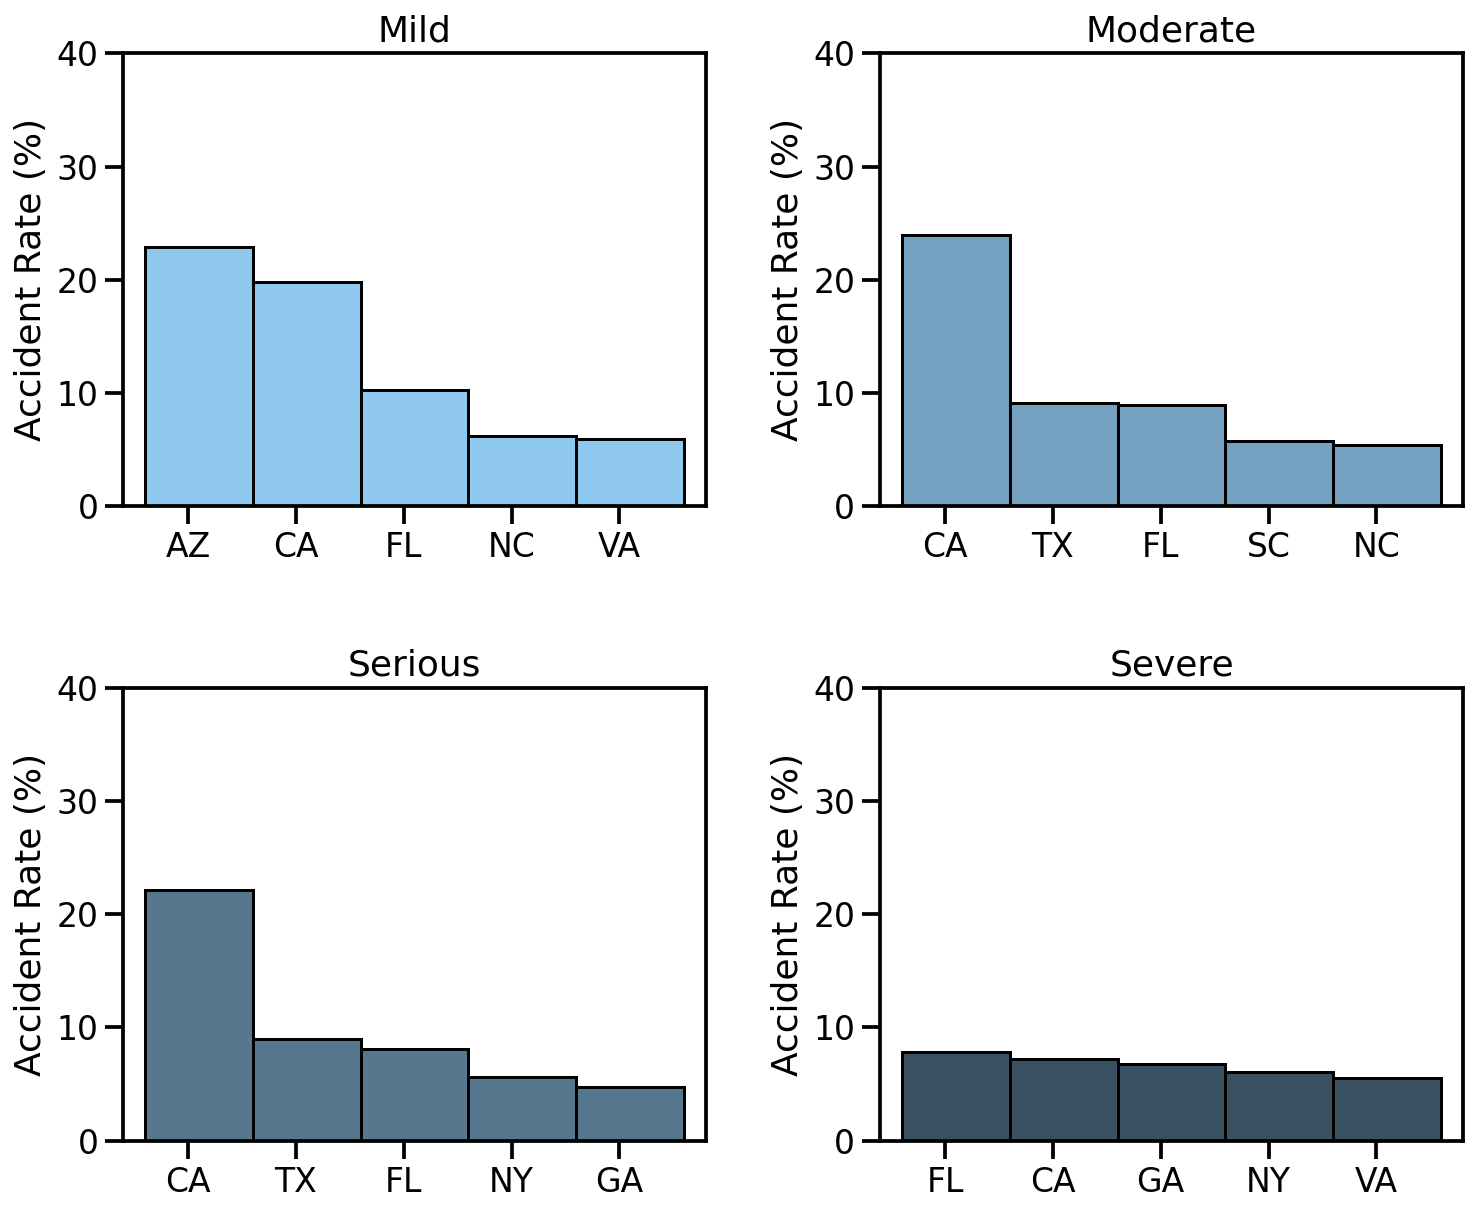

In [8]:
severity_label = ['Mild', 'Moderate', 'Serious', 'Severe']
s = [1, 0.8, 0.6, 0.4]
color = np.array([0.5, 0.8, 1])
plt.subplots(figsize=(12, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)
for i in range(1, 5):

    plt.subplot(2,2,i)
    ax = sns.barplot(data=df_state_stats[df_state_stats['severity']==i][:5],
                     x='state', y='rate',color=color*s[i-1],
                     edgecolor=(0,0,0),
                     linewidth=1.5
                    )
    [t_ax.set_width(1) for t_ax in ax.patches];
    plt.ylim([0, 40])
    plt.xlim([-0.6, 4.8])
    plt.title(severity_label[i-1])
    plt.xlabel('')
    plt.ylabel('Accident Rate (%)')
# plt.savefig('../figures/state_accident_rate.svg', dpi=300, bbox_inches='tight', facecolor="white")

In [9]:
%reset_selective -f df

# **3. Read the preprocessed data to generate figures showing accident frequency in percentage by the name of day, time, season, and weather**

In [10]:
fn = '../data/clean_data/us_accidents_preprocessed.csv'
df = pd.read_csv(fn)

In [11]:
df.head(3)

,start_lat,start_lng,temperature(f),humidity(%),pressure(in)_bc,visibility(mi)_bc,wind_speed(mph)_bc,precipitation(in)_bc,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,side_L,side_R,wind_direction_calm,wind_direction_e,wind_direction_n,wind_direction_na,wind_direction_ne,wind_direction_nw,wind_direction_s,wind_direction_se,wind_direction_sw,wind_direction_var,wind_direction_w,start_time_dayname_friday,start_time_dayname_monday,start_time_dayname_saturday,start_time_dayname_sunday,start_time_dayname_thursday,start_time_dayname_tuesday,start_time_dayname_wednesday,start_time_daypart_afternoon,start_time_daypart_early_morning,start_time_daypart_evening,start_time_daypart_late_night,start_time_daypart_morning,start_time_daypart_night,season_fall,season_spring,season_summer,season_winter,crossing,junction,traffic_signal,weather_clear,weather_fair,weather_cloudy,weather_windy,weather_rain,weather_snow,weather_obscuration,weather_sand,severity
0,39.88,-84.06,36.90,91.00,"221,782.40",2.40,2.49,0.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,3
1,39.94,-82.80,37.90,100.00,"220,916.48",2.40,2.49,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2
2,39.06,-84.06,36.00,100.00,"221,204.84",2.40,1.53,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2


In [12]:
df.shape

(4160192, 99)

### **Name of day**

In [13]:
# day name
feat_name = ['start_time_dayname_monday', 'start_time_dayname_tuesday', 'start_time_dayname_wednesday',
           'start_time_dayname_thursday', 'start_time_dayname_friday', 'start_time_dayname_saturday',
           'start_time_dayname_sunday', 'severity'
            ]
t_df = df[feat_name]

t_sum = t_df.groupby('severity').sum()
t_count = t_df.groupby('severity').count()
accident_freq_dayname = 100*t_sum/t_count
plt.barh
# accident_freq_dayname.to_csv('../data/accident_freq_dayname.csv')
accident_freq_dayname


,start_time_dayname_monday,start_time_dayname_tuesday,start_time_dayname_wednesday,start_time_dayname_thursday,start_time_dayname_friday,start_time_dayname_saturday,start_time_dayname_sunday
severity,,,,,,,
1,15.96,15.67,16.23,17.69,19.05,7.99,7.40
2,17.06,18.08,18.19,17.93,17.73,5.94,5.06
3,15.67,16.64,16.67,16.90,17.54,8.82,7.77
4,15.62,15.93,15.68,15.72,16.35,10.56,10.13


### **Time**

In [14]:
# time 
feat_name = ['start_time_daypart_early_morning', 'start_time_daypart_morning',
             'start_time_daypart_afternoon', 'start_time_daypart_evening',
             'start_time_daypart_night', 'start_time_daypart_late_night',
             'severity']
t_df = df[feat_name]
t_sum = t_df.groupby('severity').sum()
t_count = t_df.groupby('severity').count()

accident_freq_daypart = 100*t_sum/t_count
# accident_freq_daypart.to_csv('../data/accident_freq_daypart.csv')
accident_freq_daypart

,start_time_daypart_early_morning,start_time_daypart_morning,start_time_daypart_afternoon,start_time_daypart_evening,start_time_daypart_night,start_time_daypart_late_night
severity,,,,,,
1,11.36,18.49,26.54,33.14,7.04,3.43
2,18.96,23.96,20.02,22.78,8.95,5.33
3,18.49,22.43,21.26,26.12,8.59,3.12
4,16.43,17.75,19.93,20.58,13.92,11.38


### **Season**

In [15]:
# season
feat_name = ['season_spring', 'season_summer',
            'season_fall', 'season_winter',
            'severity'
           ]
t_df = df[feat_name]
t_sum = t_df.groupby('severity').sum()
t_count = t_df.groupby('severity').count()
accident_freq_season = 100*t_sum/t_count
# accident_freq_season.to_csv('../data/accident_freq_season.csv')
accident_freq_season

,season_spring,season_summer,season_fall,season_winter
severity,,,,
1,16.87,80.81,1.22,1.10
2,20.18,19.61,22.04,38.17
3,22.72,24.31,25.75,27.22
4,22.67,27.78,21.55,28.00


### **Weather**

In [16]:
# weather
feat_name = ['weather_clear', 'weather_fair', 'weather_cloudy',
             'weather_windy', 'weather_rain', 'weather_snow',
             'weather_obscuration', 'weather_sand',
             'severity'
            ]

t_df = df[feat_name]
t_sum = t_df.groupby('severity').sum()
t_count = t_df.groupby('severity').count()
accident_freq_weather = 100*t_sum/t_count
# accident_freq_weather.to_csv('../data/accident_freq_weather.csv')
accident_freq_weather


,weather_clear,weather_fair,weather_cloudy,weather_windy,weather_rain,weather_snow,weather_obscuration,weather_sand
severity,,,,,,,,
1,1.16,48.56,39.79,2.09,7.68,0.39,1.05,0.03
2,18.16,28.86,40.14,0.94,7.41,1.56,2.85,0.01
3,23.19,19.83,42.09,0.71,9.42,2.02,2.23,0.01
4,21.86,23.48,40.28,0.95,7.89,2.87,2.21,0.00
